<h1 style="text-align: center">Livrable 03 - Groupe SAHRAOUI - Projet DATA</h1>
<br>

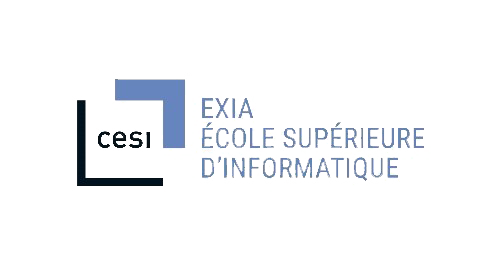

# 1. Vehicle Routing Problem : 




## Introduction 
Dans le cadre du problème de routage des véhicules (VRP), l'objectif est de trouver des itinéraires optimaux pour plusieurs véhicules visitant un ensemble de lieux. (Lorsqu'il n'y a qu'un seul véhicule, cela se réduit au problème du voyageur de commerce).
<br>
Mais qu'entendons-nous par "itinéraires optimaux" pour un VRP ? Une réponse est les itinéraires qui présentent la distance totale la plus faible. Cependant, s'il n'y a pas d'autres contraintes, la solution optimale est d'affecter un seul véhicule pour visiter tous les lieux, et de trouver l'itinéraire le plus court pour ce véhicule. C'est essentiellement le même problème que pour le TSP.
<br>
Une meilleure façon de définir les itinéraires optimaux est de réduire au minimum la longueur de l'itinéraire le plus long parmi tous les véhicules. C'est la bonne définition si l'objectif est d'effectuer toutes les livraisons le plus rapidement possible. L'exemple de PRV ci-dessous trouve des itinéraires optimaux définis de cette façon.
<br>
Dans les sections suivantes, nous décrirons d'autres façons de généraliser le TSP en ajoutant des contraintes sur les véhicules, notamment :
<br>
* Contraintes de capacité : les véhicules doivent ramasser des articles à chaque endroit qu'ils visitent, mais ont une capacité de charge maximale. <br>
* Fenêtres temporelles : chaque lieu doit être visité dans une fenêtre temporelle spécifique.

## Capacitated Vehicle Routing Problem (CVRP) :
Le problème de l'acheminement des véhicules à capacité (CVRP) est un VRP dans lequel des véhicules à capacité de transport limitée doivent aller chercher ou livrer des articles à divers endroits. Les articles ont une quantité, telle que le poids ou le volume, et les véhicules ont une capacité maximale qu'ils peuvent transporter. Le problème est de ramasser ou de livrer les articles au moindre coût, sans jamais dépasser la capacité des véhicules.

### a. Résolution du CVRP avec les OR-Tools (Algorithme Recherche de Tabou): 
#### Génération & Création des données :

In [ ]:
import random

# Définition de la taille de la matrice
w, h = 17,17
matrice = [[0] * w for i in range(h)]

# Fonction pour génrer une pendération
def generatePenderation():
    return random.randint(1,100)
    
# Attribution des valeurs pour le remplissage de la matrice
for i in range(17):
    for j in range(17):
        matrice[i][j] = matrice[j][i] = generatePenderation()
        matrice[i][i]=0
for row in matrice:
    print(row)

In [3]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [matrice]
    data['demands'] = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
    data['vehicle_capacities'] = [15, 15, 15, 15]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data

Les données sont constituées de : <br>

<strong>distance_matrice </strong>: Une matrice de distances entre des lieux sur des mètres.<br>
<strong>num_locations </strong>: Le nombre de lieux.<br>
<strong>num_vehicles </strong>: Le nombre de véhicules dans la flotte.<br>
<strong>dépôt </strong>: L'index du dépôt, l'endroit où tous les véhicules commencent et finissent leur parcours.<br>
<strong>Demandes des points de livraisons </strong>: Chaque lieu a une demande correspondant à la quantité - par exemple, le poids ou le volume - de l'article à ramasser.<br>
<strong>Capacités </strong>: Chaque véhicule a une capacité : la quantité maximale que le véhicule peut contenir. Lorsqu'un véhicule parcourt son itinéraire, la quantité totale des articles qu'il transporte ne peut jamais dépasser sa capacité.<br>


#### Le rest du code (code complet) : 

In [5]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from __future__ import print_function
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]
    data['demands'] = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
    data['vehicle_capacities'] = [30, 30]
    data['num_vehicles'] = 2
    data['depot'] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))


def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data['demands'][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(
        demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data['vehicle_capacities'],  # vehicle maximum capacities
        True,  # start cumul to zero
        'Capacity')

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH)
    search_parameters.time_limit.seconds = 30
    search_parameters.log_search = True

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

Route for vehicle 0:
 0 Load(0) ->  13 Load(4) ->  12 Load(6) ->  11 Load(7) ->  15 Load(15) ->  3 Load(17) ->  4 Load(21) ->  1 Load(22) ->  7 Load(30) ->  0 Load(30)
Distance of the route: 2352m
Load of the route: 30

Route for vehicle 1:
 0 Load(0) ->  5 Load(2) ->  8 Load(10) ->  6 Load(14) ->  2 Load(15) ->  10 Load(17) ->  16 Load(25) ->  14 Load(29) ->  9 Load(30) ->  0 Load(30)
Distance of the route: 2352m
Load of the route: 30

Total distance of all routes: 4704m
Total load of all routes: 60


## Résultats obtenu
Route for vehicle 0:
 0 Load(0) ->  13 Load(4) ->  12 Load(6) ->  11 Load(7) ->  15 Load(15) ->  3 Load(17) ->  4 Load(21) ->  1 Load(22) ->  7 Load(30) ->  0 Load(30) <br>
Distance of the route: 2352m<br>
Load of the route: 30<br>
<br>
Route for vehicle 1:
 0 Load(0) ->  5 Load(2) ->  8 Load(10) ->  6 Load(14) ->  2 Load(15) ->  10 Load(17) ->  16 Load(25) ->  14 Load(29) ->  9 Load(30) ->  0 Load(30)<br>
Distance of the route: 2352m<br>
Load of the route: 30<br>
<br>
Total distance of all routes: 4704m<br>
Total load of all routes: 60<br>

### a. Résolution du CVRP avec l'algorithme Colonie de Fourmie : 

In [2]:
import math
import random 
from datetime import datetime
import numpy as np
from random import randrange
from itertools import permutations 
import itertools
import time


hour = datetime.now().time().hour # get current hour

trafficByHour = [[0, 0, 10], # traffic by time interval (24h) {index[0]=> hour, index[1]=> min, index[2]=> max}
     [1, 0, 10], 
     [2, 0, 10], 
     [3, 0, 15],
     [4, 0, 15], 
     [5, 5, 20], 
     [6, 10, 30],
     [7, 50, 100], 
     [8, 70, 100], 
     [9, 40, 100],
     [10, 20, 80], 
     [11, 20, 80], 
     [12, 40, 100],
     [13, 40, 100], 
     [14, 10, 50], 
     [15, 30, 80],
     [16, 60, 100], 
     [17, 70, 100], 
     [18, 40, 90],
     [19, 20, 60], 
     [20, 20, 60], 
     [21, 10, 40],
     [22, 10, 20], 
     [23, 10, 20]]

minimum = trafficByHour[hour][1]   # set maximum traffic for the current time interval
maximum = trafficByHour[hour][2]   # set minimum traffic for the current time interval

mSize=10 # matrix size
quart = round(25*mSize/100) # get matrix quarter to generate tsp in vrp range
tspLength = random.randint(4, mSize-quart)  # generate traveling salesman problem length

vrp=[]
nTsp = 3

def generateTSPfromVRP(): #generate multiple travel salesman problems
    tsp=[]
    for i in range(20):  # add random nodes to our tsp in range of our matrix's size (VRP)
        r=random.randint(1,mSize-1)
        if r not in tsp: 
            tsp.append(r)
    vrp.append(tsp)

for i in range(nTsp):
    generateTSPfromVRP() # generate random traveling salesman problem in range of VRP
    
    

matrix = np.random.randint(1, size=(mSize, mSize))  # generate random binary matrix
pheromone = np.full((mSize, mSize), 1.01)  # generate pheromone matrix
temp = pheromone # renistilize pheromone table for another tsp

def generateMatrix():
    i=0
    for head in matrix:
        j=0
        for neighbor in head:
            if neighbor == 0: # if node is a neighbor for the current head
                matrix[j][i] = random.randint(minimum, maximum) # generate random ponderation between traffic interval
            matrix[i][j]=matrix[j][i] # swap/replace vertical and horizental value
            matrix[i][i]=i # set sommet id
            pheromone[i][i]=i
            j=j+1
        i=i+1

generateMatrix()
print('Matrix: \n')
print(matrix, '\n')

# sPath is a function that follow the first looking shortest path from current node each time
def sPath(ants, i, alpha, beta, decay):
    solution = [i] # final route (i = initial node)
    cu = i #current node
    for node in ants: 
        filtre = [] # set of all remaining paths of connected neighbors, to get the shortest one among all
        for n in ants:
            if n!=cu and solution.count(n) == 0: # reject current node index and all visited nodes
                filtre.append(Amatrix[cu][n]) # get all routes to others remaining neighbors

        if len(filtre)>0:
            s = min(filtre) # get shortest path among all neighbors of the current node
            for x in ants:
                if Amatrix[cu][x] == s and solution.count(Amatrix[cu][x]) == 0: # get index of shortest value
                    solution.append(x) 
                    row = pheromone[cu][x] * alpha * (( 1.0 / Amatrix[cu][x]) * beta)
                    Amatrix[cu][x]=Amatrix[cu][x]*row
                    pheromone[cu][x]=pheromone[cu][x]/decay # spread pheromone
                else: 
                    pheromone[cu][x]=pheromone[cu][x]*decay # evaporate pheromone

        cu = solution[len(solution)-1] # save next index as current index
    solution.append(i) # return to initial node
    return solution

def antColony(ants, n_iterations): #n_ants == number of nodes
    p_solutions=[] # get all ants chosen routes by iteration
    d_avg=[] # get all ponderation and pheromon average in routes chosen by ants by iteration
    iterations=[] # store iteration number of each route (additionel info)
    for i in range(0, n_iterations, 1):
        decay=0.95
        for n in ants:
            solution = sPath(ants, n, alpha=1, beta=1, decay=0.95)
            p_solutions.append(solution)
            t = dCounter(solution)
            d_avg.append(t)
            iterations.append(i)
    indexMin = d_avg.index(min(d_avg))
    shortestPath = p_solutions[indexMin]
    print("\nFinal Pheromone Matrix :\n")
    print(pheromone)
    print("\nFinal Ponderation and Pheromone Avg in Matrix :\n")
    print(Amatrix)
    print("\nBest Solution by Ant Colony : ", shortestPath)
            

# dCounter is a function to calculate ponderation between 2 nodes
def dCounter(solution):
    t = 0
    for i in range(0, len(solution)-1, 1):
        s = solution[i+1] # next node
        p = solution[i] # current node
        d = matrix[p][s] # distance between
        t = t+d
        #print(p, "=>", s, ": ", d)
    return solution, t # return combination and its total ponderation
    


def filtre(): # in order to get accurate results from possible solutions we have to filtre it
    global population
    temp = [] # temporary array to filter possible solutions
    for c in population:
        solution, t = dCounter(c)
        if t==bSolution: # if we use != instead, removing items from population will skip indexes
            temp.append(c) # so it will not check all our list
    population = temp
    print('\nAll possible solutions with same minimum ponderation : ', population)
        
        
# getCombinations is a function for getting all possible combinations from a tsp
def getCombinations(tsp):
    global bSolution
    perm = permutations(tsp) # factoriel tsp to get all combinations
    #print('All combinations :\n')
    for i in perm:
        i += (i[0],) #add initial node to the end of our tuple object (combination)
        solution, t = dCounter(i) # assign returned variables from ponderation counter function (combination, ponderation)
        combinations.append(solution)
        # print(solution, t)
        if t<=bSolution or bSolution==0: # if best solution is not assigned then save first solution as the best one 
            bSolution = t # if solution is <= then keep it as best solution and add it to population
            population.append(solution)
    print('\nMinimum Ponderation: ', bSolution)
    filtre()


def capacityCounter(combination):
    totalCapacity = 0
    for node in range(0, len(combination), 1):
        totalCapacity = totalCapacity + demand[combination[node]]
    return totalCapacity

def getBestFit():
    for c in n_combination:
        j = capacityCounter(c)
        if j <= capacity[0]:
            combinationCapacity.append(j) 
        else:
            combinationCapacity.append(0) # eliminate if bigger than truck capacity but keep its index

    bestFit = min(combinationCapacity, key=lambda x:abs(x-capacity[0])) # get closest value to truck capacity
    bestCombinations = np.where(combinationCapacity == bestFit)[0]
    optimalSolutions = [] 
    for o in bestCombinations:
        optimalSolutions.append(n_combination[o]) # get all combinations for best fit if exist more than one
    
    print('\nDemand by node : ', demand)
    print('\nCapacity by truck : ', capacity)
    print("\nAll combinations's total capacity : ", combinationCapacity)
    print('\n',bestFit, 'is the closest to our truck capacity (',capacity[0],')')
    print('\nBest capacity fit : ', bestFit)
    print('\nAll possible solutions (max capacity fit) (',len(optimalSolutions), 'found ) : ', optimalSolutions)

def shuffleCapacity(): # shuffle all combinations of nodes in order to calculate demand not route
    nodes = []
    for i in range(1, len(matrix)-1, 1):
        nodes.append(i)
    for L in range(0, len(nodes)+1):
        for c in itertools.combinations(nodes, L): 
            #print(c)
            n_combination.append(c)
    n_combination.pop(0) 
    print('\nn_combination (total demand of each combination):', n_combination)
    getBestFit()

print('VRP IS : ', vrp)
for tsp in vrp:
    pheromone = temp # renistilize pheromone table for another tsp
    combinations = []
    combinationCapacity = []
    bSolution = 0 # save as best solution if better than older
    population = [] # other possible solutions with same ponderation
    Amatrix = matrix.astype(np.float) # convert matrix to float for antColony algorithm
    demand = np.random.randint(10,50,(1,len(matrix)))[0] # generate random demand list (index==node)
    demand[0]=0 # set index 0 as depot
    capacity = [100, 100, 100] # trucks capacity (index==truck)
    n_combination = [] # all possible combinations of a groupe of nodes [1,2], [3,1], [3,2]...
    
    print('CURRENT TSP IS : ', tsp)
    print('_____________________________________________')
    print('USING ALL POSSIBLE COMBINATIONS -BEST SOLUTION-')
    print('_____________________________________________')
    start_time = time.time()
    getCombinations(tsp)
    print("\nExecution Time :")
    print("--- %s seconds ---" % (time.time() - start_time))
    print('_____________________________________________')
    print('USING ANT COLONY ALGORITHM -GOOD SOLUTION-')
    print('_____________________________________________')
    start_time = time.time()
    antColony(tsp, 1)
    print("\nExecution Time :")
    print("--- %s seconds ---" % (time.time() - start_time))
    print('_____________________________________________')
    print('BEST CAPACITY FIT  -BEST SOLUTION-')
    print('_____________________________________________')
    start_time = time.time()
    shuffleCapacity()
    print("\nExecution Time :")
    print("--- %s seconds ---" % (time.time() - start_time))


Matrix: 

[[ 0 12 16 15 20 17 12 18 17 15]
 [12  1 10 14 11 16 18 12 18 12]
 [16 10  2 16 11 20 11 20 15 20]
 [15 14 16  3 10 19 11 19 11 20]
 [20 11 11 10  4 16 17 14 20 11]
 [17 16 20 19 16  5 10 13 14 20]
 [12 18 11 11 17 10  6 14 18 17]
 [18 12 20 19 14 13 14  7 20 19]
 [17 18 15 11 20 14 18 20  8 19]
 [15 12 20 20 11 20 17 19 19  9]] 

VRP IS :  [[3, 7, 6, 2, 9, 8, 1, 5, 4], [7, 9, 8, 4, 6, 3, 1, 5], [8, 5, 3, 2, 1, 4, 9, 7]]
CURRENT TSP IS :  [3, 7, 6, 2, 9, 8, 1, 5, 4]
_____________________________________________
USING ALL POSSIBLE COMBINATIONS -BEST SOLUTION-
_____________________________________________

Minimum Ponderation:  105

All possible solutions with same minimum ponderation :  [(3, 8, 2, 6, 5, 7, 1, 9, 4, 3), (3, 4, 9, 1, 7, 5, 6, 2, 8, 3), (7, 1, 9, 4, 3, 8, 2, 6, 5, 7), (7, 5, 6, 2, 8, 3, 4, 9, 1, 7), (6, 2, 8, 3, 4, 9, 1, 7, 5, 6), (6, 5, 7, 1, 9, 4, 3, 8, 2, 6), (2, 6, 5, 7, 1, 9, 4, 3, 8, 2), (2, 8, 3, 4, 9, 1, 7, 5, 6, 2), (9, 1, 7, 5, 6, 2, 8, 3, 4, 9), (9, 4,


Minimum Ponderation:  94

All possible solutions with same minimum ponderation :  [(7, 6, 5, 8, 3, 4, 9, 1, 7), (7, 1, 9, 4, 3, 8, 5, 6, 7), (9, 4, 3, 8, 5, 6, 7, 1, 9), (9, 1, 7, 6, 5, 8, 3, 4, 9), (8, 3, 4, 9, 1, 7, 6, 5, 8), (8, 5, 6, 7, 1, 9, 4, 3, 8), (4, 9, 1, 7, 6, 5, 8, 3, 4), (4, 3, 8, 5, 6, 7, 1, 9, 4), (6, 7, 1, 9, 4, 3, 8, 5, 6), (6, 5, 8, 3, 4, 9, 1, 7, 6), (3, 8, 5, 6, 7, 1, 9, 4, 3), (3, 4, 9, 1, 7, 6, 5, 8, 3), (1, 7, 6, 5, 8, 3, 4, 9, 1), (1, 9, 4, 3, 8, 5, 6, 7, 1), (5, 8, 3, 4, 9, 1, 7, 6, 5), (5, 6, 7, 1, 9, 4, 3, 8, 5)]

Execution Time :
--- 0.4520299434661865 seconds ---
_____________________________________________
USING ANT COLONY ALGORITHM -GOOD SOLUTION-
_____________________________________________

Final Pheromone Matrix :

[[0.         1.01       1.01       1.01       1.01       1.01
  1.01       1.01       1.01       1.01      ]
 [1.01       0.46329123 0.6365519  0.46792414 0.6365519  0.57448809
  0.46792414 1.30527899 0.46792414 1.30527899]
 [1.01       


Minimum Ponderation:  100

All possible solutions with same minimum ponderation :  [(8, 5, 7, 1, 9, 4, 2, 3, 8), (8, 5, 7, 9, 1, 2, 4, 3, 8), (8, 3, 2, 4, 9, 1, 7, 5, 8), (8, 3, 4, 2, 1, 9, 7, 5, 8), (5, 8, 3, 2, 4, 9, 1, 7, 5), (5, 8, 3, 4, 2, 1, 9, 7, 5), (5, 7, 1, 9, 4, 2, 3, 8, 5), (5, 7, 9, 1, 2, 4, 3, 8, 5), (3, 8, 5, 7, 1, 9, 4, 2, 3), (3, 8, 5, 7, 9, 1, 2, 4, 3), (3, 2, 4, 9, 1, 7, 5, 8, 3), (3, 4, 2, 1, 9, 7, 5, 8, 3), (2, 3, 8, 5, 7, 1, 9, 4, 2), (2, 1, 9, 7, 5, 8, 3, 4, 2), (2, 4, 3, 8, 5, 7, 9, 1, 2), (2, 4, 9, 1, 7, 5, 8, 3, 2), (1, 2, 4, 3, 8, 5, 7, 9, 1), (1, 9, 4, 2, 3, 8, 5, 7, 1), (1, 9, 7, 5, 8, 3, 4, 2, 1), (1, 7, 5, 8, 3, 2, 4, 9, 1), (4, 3, 8, 5, 7, 9, 1, 2, 4), (4, 2, 3, 8, 5, 7, 1, 9, 4), (4, 2, 1, 9, 7, 5, 8, 3, 4), (4, 9, 1, 7, 5, 8, 3, 2, 4), (9, 1, 2, 4, 3, 8, 5, 7, 9), (9, 1, 7, 5, 8, 3, 2, 4, 9), (9, 4, 2, 3, 8, 5, 7, 1, 9), (9, 7, 5, 8, 3, 4, 2, 1, 9), (7, 5, 8, 3, 2, 4, 9, 1, 7), (7, 5, 8, 3, 4, 2, 1, 9, 7), (7, 1, 9, 4, 2, 3, 8, 5, 7), (7, 9, 1, 2, 4, 

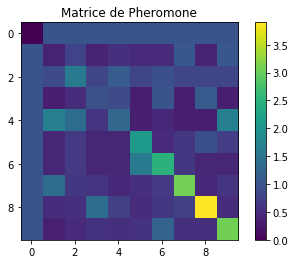

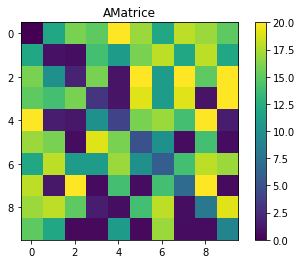

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.title("Matrice de Pheromone")
plt.imshow(pheromone)
plt.colorbar()
plt.show()

plt.title("AMatrice")
plt.imshow(Amatrix)
plt.colorbar()
plt.show()

### Fonctionnement du code : 

<strong><u>Hour </u></strong> = prendre l’heure actuelle lors de l’execution <br>
<strong><u>trafficByHour </u></strong>= générer une valeur minimale et maximale de traffic pour chaque intervalle<br>
<strong><u>mSize </u></strong>:  taille de la matrice<br>
<strong><u>tspLength </u></strong>: générer une longueur aléatoire du problème voyageur de commerce<br>
<strong><u>vrp </u></strong>: array qui contiens les tsp<br>
<strong><u>nTsp </u></strong>: nombre de tsp a générer<br>
<strong><u>matrix</u></strong>: matrice généré<br>
<strong><u>Pheromone</u></strong>: matrice des pheromones<br>
<strong><u>Combinations</u></strong>: résultats des combinaisons <br>
<strong><u>Demand</u></strong>: liste des demandes pour chaque noeud<br>
<strong><u>Capacity</u></strong>: capacité de chaque camion<br>
<strong><u>n_combinations </u></strong>: liste de toutes les combinaisons des total de demandes d’un groupe de noeuds<br>
<strong><u>start_time </u></strong>: utilisé pour le calcul du temp d’execution
<br>

Code : <br>

<strong><u>generateMatrix()</u></strong>
Générer une matrice avec des ponderations cohérentes qui dépend de l’heure de l’execution du programme, on prenant une valeur minimum et maximum a partir de l’array trafficByHour. <br>
Ex : 8h => générer une valeur du traffic entre 50 et 100 <br>

<strong><u>generateTSPfromVRP()</u></strong><br> 
Générer plusieurs tsp a partir de notre matrice généré

<strong><u>antColony()</u></strong><br>
Fonction de calcul en utilisant l’algorithme colonie de fourmis 

<strong><u>dCounter()</u></strong><br>
Une fonction de calcul du distance d’une combinaison des noeuds

<strong><u>filtre()</u></strong><br>
Une fonction qui présente la meilleure solution si était unique, et un groupe de meilleurs solutions si ils avaient une meme distance

<strong><u>getCombinations()</u></strong><br>
Une fonction qui généré toutes les combinaisons possible d’un problem tsp pour avoir la meilleure solution

<strong><u>capacityCounter()</u></strong><br>
Une fonction qui calcul le total du demande d’un ensemble de points pour avoir les meilleurs circuit de livraisons sans dépasser la capacity du vehicule

<strong><u>getBestFit()</u></strong><br>
Une fonction qui élimine les combinaisons qui ont une capacité supérieur a la capacité du véhicule

<strong><u>shuffleCapacity()</u></strong><br>
Une fonction qui génère des combinaisons des circuits de livraison

<strong><u>sPath()</u></strong><br>
Une fonction pour l’algorithme de colonie de fourmis qui prendre toujours le chemin le plus court et suivre les pheromones

<strong><h3 style="color: green"><u>Résultat obtenu :</u></h3></strong>

Affichage du matrix généré<br>
Affichage du groupe de VRP<br>
Affichage du TSP en cours de traitement<br>

USING ALL POSSIBLE COMBINATIONS -BEST SOLUTION-<br>

Resultat en utilisant la génération de toutes les combinaison possible pour un groupe de noeuds et prendre le chemin le plus court<br>
Note : affichage de combinaisons optionnel <br>

Affichage de toutes les combinaison qui ont le chemin le plus court avec le minimum du ponderation, peut être une ou plusieurs
<br>
____________________________________________________
USING ANT COLONY ALGORITHM -GOOD SOLUTION-<br>

Affichage de la matrice des pheromones en fin du programme<br>
Affichage de la matrice des pondération après avoir touché par les pheromones<br>
Affichage de solution selon nos fourmis <br>

BEST CAPACITY FIT  -BEST SOLUTION-<br>
___________________________________________
Affichage de groupe de circuit et leurs totale du demande pour avoir le circuit qui convient a la capacité de notre véhicule

Demand by node : liste de demands par noeud <br>
Capacity by truck : capacité par camion <br>
Best capacity fit : meilleure résultat ( la plus proche a la capacité du camion)<br>
All possible solutions (max capacity fit) ( 2 found ) : les combinaisons qui donne la meilleure résultat trouvé, et le nombre de résultat<br>

Execution Time : a été mis sous chaque operation pour calculer la durée de l’execution<br>

Ensuite tout ça va se répéter pour chaque tsp dans notre vrp  


<h1>2. Statistique</h1>

In [3]:
from pymongo import MongoClient
import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import math 
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import pylab as py
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv

client = MongoClient('localhost', 27017)
db = client['DataProject']
collection_trafic = db['vehicules_stamped']
data_pr = db["data_pr"]
print('Importation et initialisation')

Importation et initialisation


<h2>Verifions que nos données sont lineaires pour commencer : </h2>

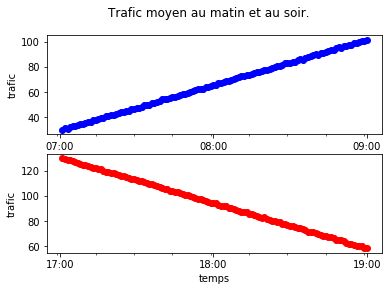

In [4]:
# extraction des donnés nombre de vehicules en fonction du temps
vehicules_par_minutes = list(collection_trafic.aggregate([
    {"$project":{"temps":{"heures":{"$hour":"$date"}, 
                          "minutes":{"$minute":"$date"}},
                 "num_arete":1,
                 "nb_vehicules":1}},
    {"$group":{"_id":{"heures":"$temps.heures", "minutes":"$temps.minutes"}, 
               "nb_vehicules":{"$avg":"$nb_vehicules"}}},
    {"$sort":{"_id":1}}
]))
trafics = [trafic["nb_vehicules"] for trafic in vehicules_par_minutes]

dates = list(collection_trafic.distinct("date"))
vehicules_par_minutes = dict([(date.strftime("%H:%M"), 0) for date in dates])

for trafic in collection_trafic.find():
    date = trafic["date"].strftime("%H:%M")
    vehicules_par_minutes[date] += trafic["nb_vehicules"]

nb_data_points = 5*len(collection_trafic.distinct("num_arete"))
trafics = [vehicules_par_minutes[date]/nb_data_points for date in vehicules_par_minutes.keys()]

# Initialisation des graphs
xs = pd.date_range("2020-06-01 07:01", "2020-06-01 09:00", freq = "min").to_pydatetime().tolist()
ys = trafics[:120]
fig, axes = plt.subplots(2)
axes[0].xaxis.set_major_locator(mdates.HourLocator(interval = 1))
axes[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval = 15))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[0].set(ylabel="trafic")
axes[0].plot(xs,ys,"bo")

xs = pd.date_range("2020-01-01 17:01", "2020-01-01 19:00", freq = "min").to_pydatetime().tolist()
ys = trafics[120:]
axes[1].xaxis.set_major_locator(mdates.HourLocator(interval = 1))
axes[1].xaxis.set_minor_locator(mdates.MinuteLocator(interval = 15))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[1].set(xlabel="temps", ylabel="trafic")
axes[1].plot(xs,ys,"ro")
fig.suptitle('Trafic moyen au matin et au soir.')

plt.show()

<h2>Calcul de la regression lineaire suivant la methode des moindres carré :</h2>

In [5]:


totalx = 0
moyx = 0
totaly = 0
moyy = 0
XprodY = 0
totalxy = 0
totalXcarre = 0
totalYcarre = 0
Ycarremoy = 0

for a in data_pr.find():
    #Calcul des moyennes
    totaly += a["nb_vehicules"]
    totalx += a["date"]
    moyy = totaly / 240
    moyx = totalx / 240
    
    #calcul du produit des moyennes X & Y
    XprodY = moyy * moyx
    
    #calcul de la moyenne des produits X & Y
    totalxy += a["nb_vehicules"] * a["date"]
    moyXmoyY = totalxy / 240
    
    #Moyenne des carrés de X
    totalXcarre += math.pow(a["date"], 2)
    Xcarremoy = totalXcarre / 240
    
    #Moyenne des carrés de Y
    totalYcarre += math.pow(a["nb_vehicules"], 2)
    Ycarremoy = totalYcarre / 240

#calcul du carré de la moyenne 
moyXcarre = math.pow(moyx, 2)
moyYcarre = math.pow(moyy, 2)

print("Moyenne du temps : " + str(moyx))
print("Moyenne du trafique : " + str(moyy))
print("Produit des moyennes X & Y : " + str(XprodY))
print("Moyenne des produits  X  & Y : " + str(moyXmoyY))
print("Carré de la moyenne X: " + str(moyXcarre))
print("Moyenne des carré de X: " + str(Xcarremoy))

a = 0
CovXY = 0


CovXY = moyXmoyY - XprodY
varY = Ycarremoy - moyYcarre
varX = Xcarremoy - moyXcarre
a = CovXY / varX
print("Covariance de XY : " + str(CovXY))
print("Variance de X : " + str(varX))
print("Variance de Y : " + str(varY))
print("Valeure de a : " + str(a))

b = 0
moyxProdA = 0

moyxProdA = moyx * a
b = moyy - moyxProdA

print("Valeure de b : " + str(b))
print(" ")
print("Nous obtenons donc en fonction de nos données la fonction lineaire y = ax + b en remplacant a et b : " )
print(" ")
print("Y = " + str(a) + " X + " + str(b))
print(" ")
R = 0
R = CovXY / (math.sqrt(varX) * math.sqrt(varY))
print("Nous pouvons  obtenir la valeur de R (correllation) : " + str(R) )
print("et donc le coefficient de determination : " + str(math.pow(R, 2)))

Moyenne du temps : 0.5413194444458332
Moyenne du trafique : 199633.75
Produit des moyennes X & Y : 108065.63064263837
Moyenne des produits  X  & Y : 115417.80557895148
Carré de la moyenne X: 0.2930267409351455
Moyenne des carré de X: 0.3370081822270724
Covariance de XY : 7352.174936313109
Variance de X : 0.04398144129192688
Variance de Y : 3965862676.262497
Valeure de a : 167165.39341021221
Valeure de b : 109143.87210861477
 
Nous obtenons donc en fonction de nos données la fonction lineaire y = ax + b en remplacant a et b : 
 
Y = 167165.39341021221 X + 109143.87210861477
 
Nous pouvons  obtenir la valeur de R (correllation) : 0.5566885225021594
et donc le coefficient de determination : 0.3099021110856372


<h2>Tracé de la ligne de regression sur les données d'une arrete</h2>

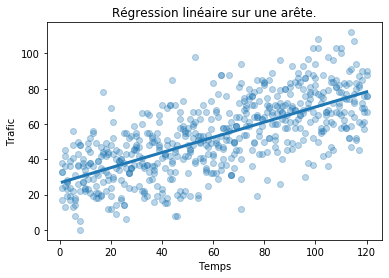

In [15]:
arete_max, arete_min = vehicules_par_arete[0]["_id"], vehicules_par_arete[-1]["_id"]
vehicules_arete_max = db.vehicules_stamped.aggregate([
    {"$match":{"num_arete":{"$eq":arete_max}}},
    {"$project":{"temps":{"heures":{"$hour":"$date"}, 
                          "minutes":{"$minute":"$date"}},
                "nb_vehicules":1}},
    {"$match":{"temps.heures":{"$lte":9, "$gte":7}}},
     {"$sort":{"temps":1}}])
vehicules_arete_min = db.vehicules_stamped.aggregate([
    {"$match":{"num_arete":{"$eq":arete_min}}},
    {"$project":{"temps":{"heures":{"$hour":"$date"}, 
                          "minutes":{"$minute":"$date"}},
                "nb_vehicules":1}},
    {"$match":{"temps.heures":{"$lte":9, "$gte":7}}},
     {"$sort":{"temps":1}}])

xs = pd.date_range("2020-01-01 07:01", "2020-01-01 09:00", freq = "min").to_pydatetime().tolist()
xs = [e for sub in zip(xs, xs, xs, xs, xs) for e in sub] 

X = [(date.hour-7)*60+date.minute for date in xs]
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = np.array([X]).T, axis = 1)
regressor_OLS = sm.OLS(endog = ys, exog = X).fit()
y_pred = regressor_OLS.params[0]+regressor_OLS.params[1]*X[:,1]




fig, ax = plt.subplots()
ax.scatter(X[:,1], ys, alpha=0.3)
ax.set(title="Régression linéaire sur une arête.", xlabel="Temps", ylabel="Trafic")
ax.plot(X[:,1], y_pred, linewidth=3)

plt.show()

<h2>Tests de verifications des hypotheses </h2>

In [16]:
print("Nous utilisons la bibliothéque statsmodels pour faire nos test.")
print(" ")
print("Test d'homogeneite (H0 : La variance des residus est homogène)")
print('p valeur de Goldfeld–Quandt test est: ', 
      sms.het_goldfeldquandt(ys, regressor_OLS.model.exog)[1])
print('p valeur of Breusch–Pagan test est: ', sms.het_breuschpagan(regressor_OLS.resid, 
                                                                 regressor_OLS.model.exog)[1])
print('p valeur de White test est: ', sms.het_white(regressor_OLS.resid**2, 
                                                   regressor_OLS.model.exog)[1])

Nous utilisons la bibliothéque statsmodels pour faire nos test.
 
Test d'homogeneite (H0 : La variance des residus est homogène)
p valeur de Goldfeld–Quandt test est:  0.10985517028492815
p valeur of Breusch–Pagan test est:  0.06741969743670223
p valeur de White test est:  0.06722593500122953


Le risque est fixé habituellement à $\alpha=0.05$, la procédure à suivre est que si la p-valeur est inférieure à $\alpha=0.05$ alors on dit que le test rejette l'hypothèse nulle (la variance change en fonction de « x »). Si on a le contraire, on en conclut que le test n'arrive pas à rejeter l'hypothèse nulle. Normalement, la p-valeur est ici supérieure à 0.5.

Testons maintenant la normalité des résidus. Cette courbe permet de comparer les quantiles de la loi normale avec les quantiles de l'échantillon. Si les points s'alignent bien sur la droite $y=x$, cela vousdra dire que notre echantilln suit une loi normale.

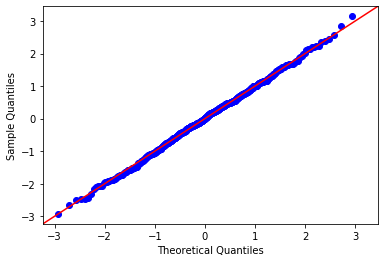

In [32]:
from scipy import stats
import pylab as py

sm.qqplot(regressor_OLS.resid_pearson, line ='45') 
py.show()

In [33]:
print("Nous utilisons la bibliothéque statsmodels pour faire nos test.")
print(" ")
print("Test de normalite (H0 : les donnes suivent une loi Normale)")
print('p valeur de Jarque-Bera test est: ', stats.jarque_bera(regressor_OLS.resid)[1])
print('p value de Shapiro-Wilk test est: ', stats.shapiro(regressor_OLS.resid)[1])

Nous utilisons la bibliothéque statsmodels pour faire nos test.
 
Test de normalite (H0 : les donnes suivent une loi Normale)
p valeur de Jarque-Bera test est:  0.8403005397607842
p value de Shapiro-Wilk test est:  0.933542013168335


L'hypothèse nulle correspond ici au fait de dire que les données suivent une loi Normale et nous pouvons observer ci-dessus que notre p value est superieur à 0.5. L'hypothése n'est pas rejetée.